In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 

In [3]:
#importing the resources our data from data file and the id mapping.
data = pd.read_csv(os.getenv("dataFile"))
IDs = pd.read_csv(os.getenv("encodingFile"))

In [ ]:
#Handling the missing values by replacing '?' character to none to facilitate data usability.
#loop over columns each series and reset null values to none.
for (columnName, columnData) in data.items():
   print('Column Name : ', columnName)
   data.replace('?', None, inplace=True)
   print(data.isnull().sum())
# data.describe()

In [ ]:
# dropping the columns with more than 90% null values
for (columnName, columnData) in data.items():
    if(data[columnName].isnull().sum()/data[columnName].count() >= 0.9 ):
        data.drop(columnName,axis=1, inplace = True)
print(data.head())

In [ ]:
#description on each column and the number of its null values.
for (columnName, columnData) in data.items():
   print('Column Name : ', columnName)
   print('Missing values:', columnData.isnull().sum())

In [7]:
##help(pd.get_dummies)
# data.describe()

In [8]:
#dictionaries will be set in our active data column's by it's decoded value from id_mapping file..
admission_type_map = {
    1: "Emergency", 2: "Urgent", 3: "Elective", 4: "Newborn",
    5: "Not Available", 6: "NULL", 7: "Trauma Center", 8: "Not Mapped"
}

discharge_disposition_map = {
    1: "Discharged to home",
    2: "Discharged/transferred to another short term hospital",
    3: "Discharged/transferred to SNF",
    4: "Discharged/transferred to ICF",
    5: "Discharged/transferred to another type of inpatient care institution",
    6: "Discharged/transferred to home with home health service",
    7: "Left AMA",
    8: "Discharged/transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home",
    14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab facility including rehab units of a hospital",
    23: "Discharged/transferred to a long term care hospital",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    27: "Discharged/transferred to a federal health care facility",
    28: "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH)",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
}

admission_source_map = {
    1: "Physician Referral",
    2: "Clinic Referral",
    3: "HMO Referral",
    4: "Transfer from a hospital",
    5: "Transfer from a Skilled Nursing Facility (SNF)",
    6: "Transfer from another health care facility",
    7: "Emergency Room",
    8: "Court/Law Enforcement",
    9: "Not Available",
    10: "Transfer from critical access hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    15: "Not Available",
    17: "NULL",
    18: "Transfer From Another Home Health Agency",
    19: "Readmission to Same Home Health Agency",
    20: "Not Mapped",
    21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac reslt in a sep claim",
    23: "Born inside this hospital",
    24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center",
    26: "Transfer from Hospice"
}

In [ ]:
#Mapping of the dictionaries into the main dataframe..
data['admission_type_desc'] = data['admission_type_id'].map(admission_type_map)
data['discharge_desc'] = data['discharge_disposition_id'].map(discharge_disposition_map)
data['admission_source_desc'] = data['admission_source_id'].map(admission_source_map)

#encoding each column into a numberical value
data=pd.get_dummies(data,columns=['admission_type_desc'])
data=pd.get_dummies(data,columns=['discharge_desc'])
data=pd.get_dummies(data,columns=['admission_source_desc'])

#dropping the columns that have been mapped..
data.drop('admission_type_id',axis = 1, inplace = True)
data.drop('discharge_disposition_id',axis = 1, inplace = True)
data.drop('admission_source_id',axis = 1, inplace = True)

print(data.head())
# data.describe()

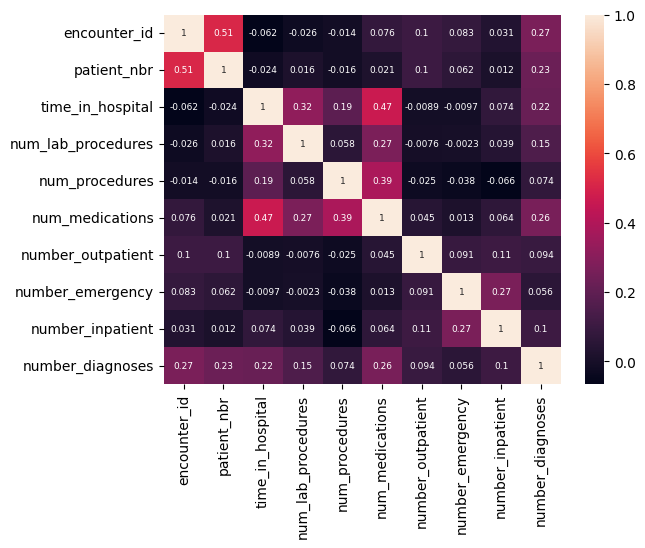

In [10]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),annot=True, annot_kws={'size': 6.5})
plt.show()

In [ ]:
# Function to extract midpoint from range string
def extract_midpoint(range_str):
    try:
        # Extract the numbers from strings like '[0-10]'
        range_str = range_str.strip('[]()')  # Remove brackets
        lower, upper = map(int, range_str.split('-'))  # Split by hyphen and convert to integers
        return (lower + upper) / 2  # Return the midpoint
    except:
        return None  # Return None if conversion fails

# Apply the function to the 'age' column
# print("Original 'age' column (first few values):")
# print(data['age'].head())

# Convert age ranges to midpoints
data['age_numeric'] = data['age'].apply(extract_midpoint)

print("\nConverted 'age_numeric' column (first few values):")
print(data['age_numeric'].head())

#################################
# If you want to replace the original column instead of creating a new one:
# data['age'] = data['age'].apply(extract_midpoint)
#################################

# Check if there were any values that couldn't be converted
null_count = data['age_numeric'].isna().sum()
print(f"\nNumber of values that couldn't be converted: {null_count}")

# If there are any null values, you might want to investigate
if null_count > 0:
    print("\nSample of problematic values:")
    problematic = data[data['age_numeric'].isnull()]['age'].unique()
    print(problematic[:5])  # Print up to 5 unique problematic values


# Ensure the 'age' column is not dropped before applying the extract_midpoint function
# Drop the 'age' column only after creating 'age_numeric'
data.drop('age', axis=1, inplace=True)
# data.describe()

In [ ]:
data.describe()

In [ ]:

# First, examine which columns are being detected as 'object' type
object_cols = data.select_dtypes(include=['object']).columns
print(f"Columns detected as 'object' type: {list(object_cols)}")

# Check each object column to see if it contains numeric values stored as strings
for col in object_cols:
    print(f"\nColumn '{col}' sample values:")
    print(data[col].head())
    
    # Try to convert to numeric and see if it works
    numeric_conversion = pd.to_numeric(data[col], errors='coerce')
    conversion_success_rate = 1 - (numeric_conversion.isna().sum() / len(data))
    print(f"Successfully converts to numeric: {conversion_success_rate:.1%}")
    
    if conversion_success_rate > 0.9:  # If over 90% converts successfully
        print(f"⚠️ Column '{col}' appears to contain numeric data stored as strings!")
        # Convert the column to numeric
        data[col] = numeric_conversion
        print(f"✓ Converted '{col}' to numeric type")

# After conversion, re-detect categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns after conversion: {list(categorical_cols)}")

In [ ]:
data.describe()

In [ ]:
# Now proceed with your original one-hot encoding and correlation analysis
for columnName in categorical_cols:
    data = pd.get_dummies(data, columns=[columnName])

corr_matrix = data.corr()

# Original low correlation filtering
# low_corr_columns = [col for col in corr_matrix.columns if (corr_matrix[col].abs().max() < 0.5)]
# data.drop(columns=low_corr_columns, inplace=True)

low_corr_columns = []
for col in corr_matrix.columns:
    # Get correlations excluding self (which is always 1.0)
    max_corr = corr_matrix[col].drop(col).abs().max()
    if max_corr < 0.3:
        low_corr_columns.append(col)

print(f"Found {len(low_corr_columns)} columns with max correlation < 0.3")
data.drop(columns=low_corr_columns, inplace=True)
print(f"Dataframe shape after dropping: {data.shape}")

# print(f"\nRemoved {len(low_corr_columns)} columns with low correlation")
# print(f"Final dataframe shape: {data.shape}")

print(data.head())
# Now re-detect categorical columns after type conversion
# for (columnName, columnData) in data.items():
#     data=pd.get_dummies(data,columns=[columnName])

# print(data.head())
# corr_matrix=data.corr()

# low_corr_columns = [col for col in corr_matrix.columns if (corr_matrix[col].abs().max() < 0.2)]

# data.drop(columns=low_corr_columns, inplace=True)



In [ ]:
data.describe()

In [17]:
# for (columnName, columnData) in data.items():
#     print('Column Name : ', columnName)
#     if np.issubdtype(columnData.dtype, np.number):
#         Q1 = data[columnName].quantile(0.25)
#         Q3 = data[columnName].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
#         print(columnName)
#         print(outliers[columnName].count()) 
#         data[columnName].clip(lower = lower_bound,upper=upper_bound)
#         outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
#         print(outliers[columnName].count()) 
# data.describe()

In [ ]:
data.describe()
data.shape

In [ ]:
print(data.shape)
mask = pd.Series(True ,index = data.index)
for (columnName, columnData) in data.items():
    print('Column Name : ', columnName)
    if np.issubdtype(columnData.dtype, np.number):
        Q1 = data[columnName].quantile(0.25)
        Q3 = data[columnName].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        in_bounds = columnData.between(lower_bound,upper_bound)
        mask &= in_bounds
data = data[mask]
print(data.shape)

##outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
        
##    print(columnName)
##      print(outliers[columnName].count()) 
##data[columnName].clip(lower = lower_bound,upper=upper_bound)
## outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
# ##print(outliers[columnName].count()) 

In [ ]:
print(data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare features and labels
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
Y = data['readmitted_<30']

# Split the dataset (use stratify if highly imbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [i for i in range(9)],
    'class_weight': ['balanced']
}

# Initialize and search
rf = RandomForestClassifier(random_state=42)
#rf = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=4, class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=13, cv=3, scoring='recall', n_jobs=-1, random_state=42, verbose=1)

random_search.fit(x_train_res, y_train_res)

#print(f'Best parameters found: {random_search.best_params_}')

# Evaluate
#best_rf = random_search.best_estimator_
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Feature importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

# Tree visualization
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("One Tree from the Best Random Forest")
plt.show()


In [ ]:
# KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

# Separate features (all columns except last) and target (last column) from the dataset
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into training and testing sets with 60% training and 40% testing, fixed random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=30)

# Initialize StandardScaler to normalize features
scale = StandardScaler()

# Fit scaler on training data and transform both training and testing data to scale features
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# Define hyperparameter grid to search for the best number of neighbors and distance metric
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 13, 15],  
    'weights': ['distance'],               
    'metric': ['euclidean']                 
}

# Initialize K-Nearest Neighbors classifier (default parameters)
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation, optimizing for accuracy score
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Retrieve the best KNN model found by grid search
best_knn = grid_search.best_estimator_

# Use the best model to predict target values for the scaled test set
y_predict = best_knn.predict(x_test_scaled)

print("Best params: ", grid_search.best_params_)
print("Best cv score: ", grid_search.best_score_)
print("Accuracy: ", best_knn.score(x_test_scaled, y_test))
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))


In [ ]:
# # removing people came more than one time..
# data_unique = data.drop_duplicates(subset=['patient_nbr'], keep='first')
# print(data_unique.value_counts)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Prepare features and target
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
Y = data['readmitted_<30']

# 2. Split data into train and test sets (stratified)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# 3. Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 4. Apply SMOTE only on the training set (scaled)
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

# 5. Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 6. Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],        
    'n_estimators': [150, 200],       
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.7, 1],            
    'colsample_bytree': [0.7, 1]     
}

# 7. Setup GridSearchCV with 3-fold CV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=2,
    refit=True
)

# 8. Fit model on SMOTE training data
grid_search.fit(x_train_smote, y_train_smote)

# 9. Predict on scaled test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test_scaled)
y_prob = best_xgb.predict_proba(x_test_scaled)[:, 1]

# 10. Calculate metrics
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Best parameters: {grid_search.best_params_}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

In [ ]:
# # Logistic Regression with SMOTE applied before train-test split
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# import numpy as np

# X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
# Y = data['readmitted_<30']

# sm = SMOTE(random_state=42)
# X_smote, Y_smote = sm.fit_resample(X, Y)

# x_train, x_test, y_train, y_test = train_test_split(
#     X_smote, Y_smote, test_size=0.2, random_state=42, stratify=Y_smote
# )

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
# x_test_scaled = scaler.transform(x_test)        # Transform test data (using same scaler)

# model = LogisticRegression(
#     random_state=42,
#     solver='saga',
#     max_iter=200,
#     class_weight='balanced'
# )

# param_dist = {
#     'C': np.logspace(-2, 1, 10),
#     'penalty': ['l1', 'l2']
# }

# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=8,
#     scoring='f1',
#     n_jobs=-1,
#     cv=2,
#     verbose=2,
#     random_state=42,
#     refit=True
# )

# random_search.fit(x_train_scaled, y_train)

# best_model = random_search.best_estimator_
# y_pred = best_model.predict(x_test_scaled)
# y_prob = best_model.predict_proba(x_test_scaled)[:, 1]

# print(f"Best hyperparameters: {random_search.best_params_}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# roc_auc = roc_auc_score(y_test, y_prob)
# print(f"ROC AUC: {roc_auc:.4f}")


In [ ]:
#Logistic smote on training data.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Define features (X) and target (Y)
# Dropping unused target variants and identifiers
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
Y = data['readmitted_<30']

# Step 2: Split the dataset into training and testing sets (80/20)
# Stratify ensures class proportions are preserved in both sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Step 3: Apply SMOTE to balance class distribution in training data
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# Step 4: Standardize features (important for logistic regression convergence)
scaler = StandardScaler()
x_train_smote_scaled = scaler.fit_transform(x_train_smote)  # Fit and transform training data
x_test_scaled = scaler.transform(x_test)                    # Transform test data (using same scaler)

# Step 5: Initialize logistic regression model
model = LogisticRegression(
    random_state=42,
    solver='saga',
    max_iter=200,
    class_weight='balanced'
)

# Step 6: Define hyperparameter search space for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-2, 1, 10),   
    'penalty': ['l1', 'l2']       
}

# Step 7: Set up RandomizedSearchCV to tune hyperparameters using cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,                    
    scoring='f1',                 
    n_jobs=-1,                    
    cv=3,                         
    verbose=2,                    
    random_state=42,
    refit=True                    
)

# Step 8: Train model using SMOTE-resampled and scaled training data
random_search.fit(x_train_smote_scaled, y_train_smote)

# Step 9: Predict on the scaled original test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
y_prob = best_model.predict_proba(x_test_scaled)[:, 1]

# Step 10: Evaluate performance
print(f"Best hyperparameters: {random_search.best_params_}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # 1. Split train/test with stratification
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# # 2. Apply SMOTE to training data only
# sm = SMOTE(random_state=42)
# x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# # 3. Initialize XGBoost classifier
# xgb_clf = xgb.XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42,
# )

# # 4. Define hyperparameter grid
# param_grid = {
#     'max_depth': [3, 5, 7, 10, 15],      
#     'n_estimators': [50, 100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.15],  
#     'subsample': [0.5, 0.7, 1],
#     'colsample_bytree': [0.5, 0.7, 1]
# }

# # 5. Setup RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_clf,
#     param_distributions=param_grid,
#     n_iter=50,
#     scoring='f1',
#     n_jobs=-1,
#     cv=3,
#     verbose=2,
#     random_state=42,
#     refit=True
# )

# # 6. Fit model on SMOTE-resampled training data
# random_search.fit(x_train_smote, y_train_smote)

# # 7. Evaluate on test data with threshold tuning
# best_xgb = random_search.best_estimator_
# y_proba = best_xgb.predict_proba(x_test)[:, 1]

# # Find best threshold for F1 score
# best_threshold = 0.5
# best_f1 = 0
# for thresh in np.arange(0.01, 1.0, 0.01):
#     y_pred_thresh = (y_proba >= thresh).astype(int)
#     f1 = f1_score(y_test, y_pred_thresh)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_threshold = thresh

# # Predict using the best threshold
# y_pred_best = (y_proba >= best_threshold).astype(int)

# # 8. Print results
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best threshold by F1 score: {best_threshold:.2f} with F1: {best_f1:.4f}\n")
# print("Confusion Matrix at best threshold:\n", confusion_matrix(y_test, y_pred_best))
# print("Classification Report at best threshold:\n", classification_report(y_test, y_pred_best))
# print(f"Accuracy at best threshold: {accuracy_score(y_test, y_pred_best):.4f}")


In [ ]:
# SVM model 
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=30)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 
clf = svm.SVC(kernel='linear')
clf.fit(x_train_scaled, y_train)
scores = cross_val_score(clf, x_train_scaled, y_train, cv=5)
y_predict = clf.predict(x_test_scaled)
print(classification_report(y_test, y_predict))
print(f"CV score:", scores.mean())
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

for i in range(10):
    print(f"True: {y_test.iloc[i]}, Predicted: {y_predict[i]}")

In [ ]:
#Random Forest Model (Still needs further development)

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=400,
    class_weight='balanced',  # Handles imbalance
    max_depth=6,            # Prevents overfitting
    random_state=42
)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=9, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(feature_importance_df.head(10))

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:15][::-1], feature_importance_df['Importance'][:15][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances in Decision Tree")
plt.tight_layout()
plt.show()

# import numpy as np
# import pandas as pd
# from sklearn.metrics import classification_report, recall_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
# y = data['readmitted_<30']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# param_grid = {
#     'max_depth': list(range(3, 20))
#     #'max_depth': list(range(41, 61))
# }

# clf = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')

# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
#     scoring='recall',
#     cv=4,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

# best_clf = grid_search.best_estimator_
# print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
# print(f"Best recall (CV average): {grid_search.best_score_:.4f}")

# y_pred = best_clf.predict(X_test)
# print("\nTest Set Evaluation:")
# print(classification_report(y_test, y_pred))
